## Exo 14

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

plt.set_cmap(cmap='PiYG')

<Figure size 640x480 with 0 Axes>

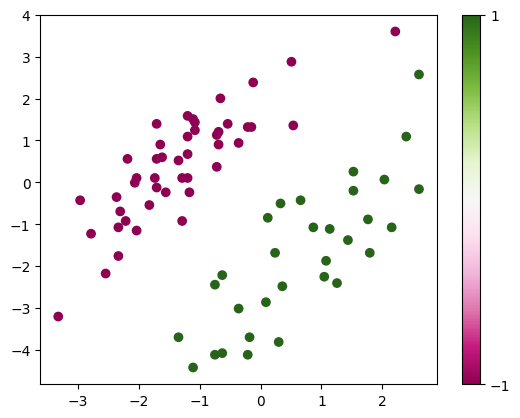

In [ ]:
data441 = loadmat('data441.mat')
t, x1, x2 = data441['t'], data441['x1'], data441['x2']
plt.figure()
plt.scatter(x1, x2, c=t), plt.colorbar()
plt.show()

Les classes sont linéarement séparables. Appliquons la **méthode des moindres carrés** pour trouver l'hyperplan qui sépare les données.

In [53]:
N = t.shape[0] # Nombre de points 
D = 2 # Dimensions 

# Valeurs cibles (marges positives en config normalisée)
B = np.ones(shape=(N, 1))

# Matrice Y : échantillons augmentés et normalisés
Y = np.concatenate((t * x1, t * x2, t), axis=1)

# Matrice pseudo-inverse (car Ya = B --> a = YpB)
Yp = np.linalg.pinv(Y)

a = np.dot(Yp, B)

print("Les poids W = [{:}, {:}]".format(a[0,0], a[1,0]))
print("Le biais w0 = ", a[2,0])

Les poids W = [0.5001438489878454, -0.35392555965885286]
Le biais w0 =  -0.10007727342738076


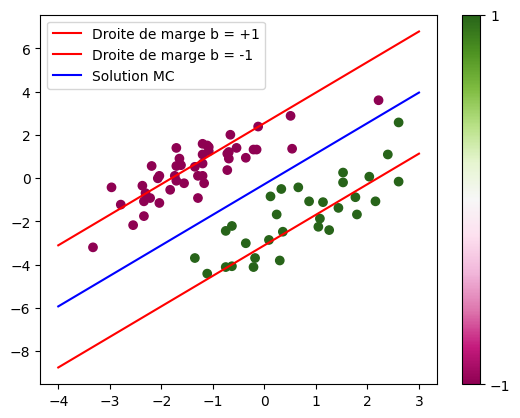

In [54]:
def hyperplan(a,x,b):
    w1, w2, w0 = a[0,0], a[1,0], a[2,0]
    return (b - w0 - w1 * x) / w2

xx = np.linspace(np.ceil(np.min(np.concatenate((x1, x2)))), np.floor(np.max(np.concatenate((x1, x2)))))
yy_p1 = hyperplan(a, xx, 1)
yy_m1 = hyperplan(a, xx, -1)
yy = hyperplan(a, xx, 0)

plt.figure()
plt.scatter(x1, x2, c=t), plt.colorbar(ticks=[-1,1])
plt.plot(xx, yy_p1, 'r', label='Droite de marge b = +1')
plt.plot(xx, yy_m1, 'r', label='Droite de marge b = -1')
plt.plot(xx, yy, 'b', label='Solution MC')
plt.legend()
plt.show()

On peut aussi implémenter la méthode de **régression logistique**.

In [56]:
def logistic_regression(x1, x2, lab, max_iter=200, min_norm=1e-3, lambda_reg=np.finfo(float).eps):
    """
    Régression logistique 2D, à 2 classes.
    Entrées :
        x1, x2 : coordonnées des points.
        lab : labels (0 pour classe négative, 1 pour classe positive).
        max_iter : nombre maximum d'itérations (défaut : 200).
        min_norm : critère de convergence pour la norme relative (défaut : 1e-3).
        lambda_reg : régularisation pour éviter les problèmes numériques (défaut : eps machine).
    Sortie :
        w : vecteur de poids [w0, w1, w2].
    """

    # Matrice Phi et identité 3x3
    phi = np.column_stack((x1, x2, np.ones_like(x1)))
    I3 = np.eye(3)

    # Initialisation des poids
    w = np.zeros(3)
    i = 0
    test_norm = 1

    # Boucle principale Newton-Raphson
    while i < max_iter and test_norm > min_norm:
        w = w.flatten()
        w_old = w.copy()

        # Calcul intermédiaire
        a = phi @ w
        pk = 1 / (1 + np.exp(-a))  # Probabilités
        W = np.diag(pk * (1 - pk))  # Matrice diagonale des poids

        # Mise à jour des poids (avec régularisation)
        H = phi.T @ W @ phi + lambda_reg * I3  # Hessienne régularisée

        grad = phi.T @ (lab - pk.reshape(lab.shape))  # Gradient
        w = w.reshape((3,1)) + np.linalg.inv(H) @ grad

        # Critère d'arrêt
        test_norm = np.linalg.norm(w_old - w) / np.linalg.norm(w)
        i += 1

    # Affichage de l'équation de la droite et des itérations
    print(f"Équation de la droite : {w[0]} + {w[1]} * x1 + {w[2]} * x2 = 0")
    print(f"{i} itérations")

    return w


In [73]:
w = logistic_regression(x1, x2, (t+1)/2)
w = w / np.linalg.norm(w)

Équation de la droite : [67.79960978] + [-50.83083444] * x1 + [-8.64040539] * x2 = 0
200 itérations


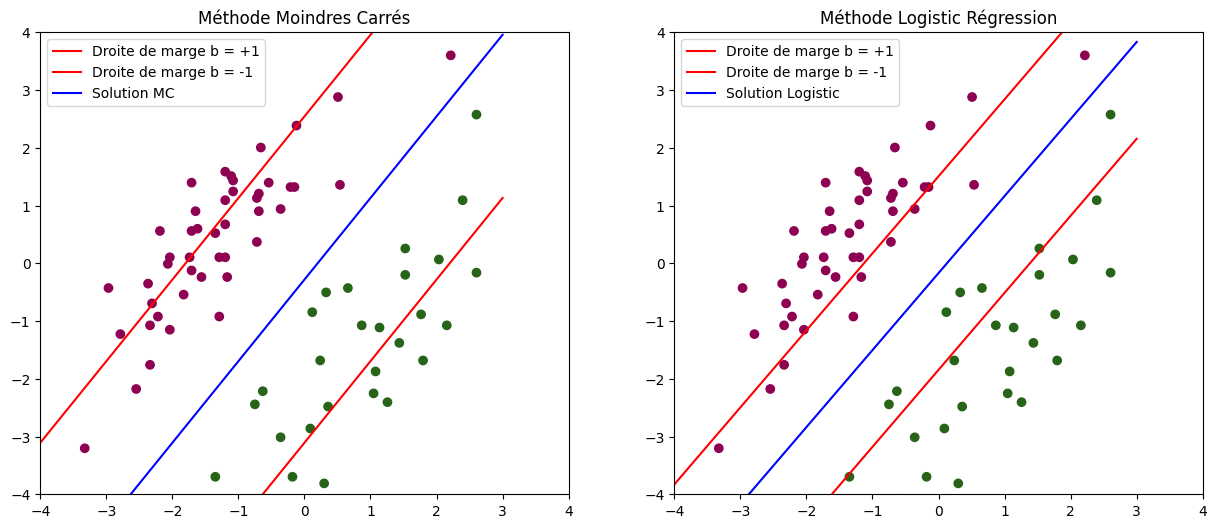

In [75]:
yy_lr_p1 = hyperplan(w, xx, 1)
yy_lr_m1 = hyperplan(w, xx, -1)
yy_lr = hyperplan(w, xx, 0)

fig, axs = plt.subplots(1,2, figsize=(15,6))
axs[0].scatter(x1, x2, c=t)
axs[0].plot(xx, yy_p1, 'r', label='Droite de marge b = +1')
axs[0].plot(xx, yy_m1, 'r', label='Droite de marge b = -1')
axs[0].plot(xx, yy, 'b', label='Solution MC')
axs[0].legend(), axs[0].set_title('Méthode Moindres Carrés')
axs[0].set_xlim(-4, 4), axs[0].set_ylim(-4, 4)

axs[1].scatter(x1, x2, c=t)
axs[1].plot(xx, yy_lr_p1, 'r', label='Droite de marge b = +1')
axs[1].plot(xx, yy_lr_m1, 'r', label='Droite de marge b = -1')
axs[1].plot(xx, yy_lr, 'b', label='Solution Logistic')
axs[1].legend(), axs[1].set_title('Méthode Logistic Régression')
axs[1].set_xlim(-4, 4), axs[1].set_ylim(-4, 4)

plt.show()

Il existe déjà des fonctions python qui codent les deux méthodes. Une illustration.

Méthode de régression logistique avec la bibliothèque ```sklearn```:

Équation de l'hyperplan : [-0.39510597] + [2.18644909] * x1 + [-1.62815372] * x2 = 0
[[-0.39510597]
 [ 2.18644909]
 [-1.62815372]]


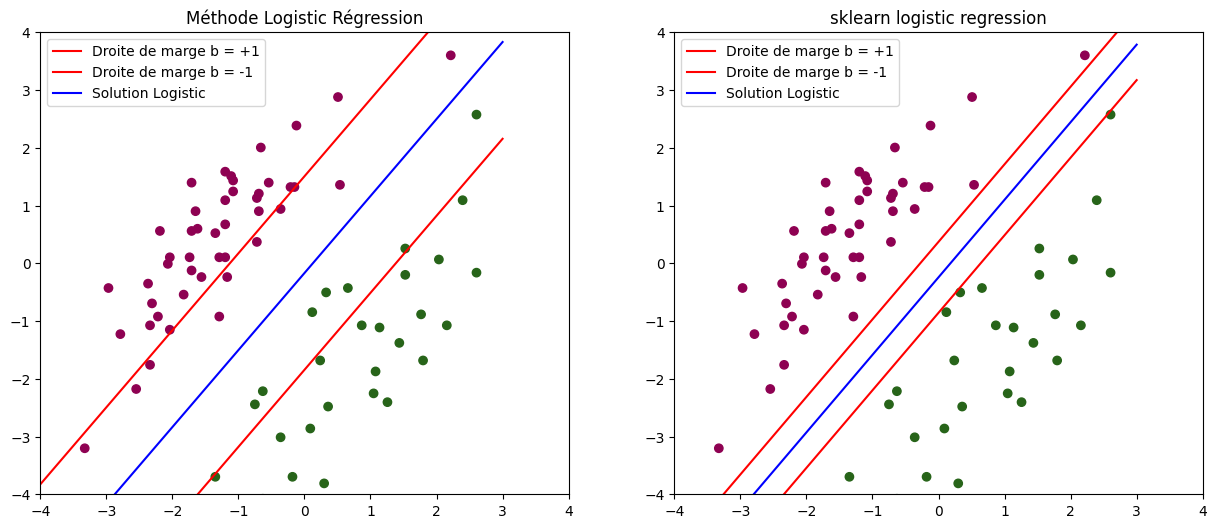

In [96]:
from sklearn.linear_model import LogisticRegression

# Exemple avec des données
X = np.column_stack((x1, x2))  # Combiner les caractéristiques en une matrice
y = t.ravel()

# Modèle de régression logistique
model = LogisticRegression()
model.fit(X, y)

# Poids obtenus
w = np.hstack((model.intercept_, model.coef_[0])).reshape((3,1))
print(f"Équation de l'hyperplan : {w[0]} + {w[1]} * x1 + {w[2]} * x2 = 0")
print(w)
yy_sk_p1 = (1 - w[0] - w[1] * xx) / w[2]
yy_sk_m1 = (-1 - w[0] - w[1] * xx) / w[2]
yy_sk = (0 - w[0] - w[1] * xx) / w[2]

fig, axs = plt.subplots(1,2, figsize=(15,6))

axs[1-1].scatter(x1, x2, c=t)
axs[1-1].plot(xx, yy_lr_p1, 'r', label='Droite de marge b = +1')
axs[1-1].plot(xx, yy_lr_m1, 'r', label='Droite de marge b = -1')
axs[1-1].plot(xx, yy_lr, 'b', label='Solution Logistic')
axs[1-1].legend(), axs[1-1].set_title('Méthode Logistic Régression')
axs[1-1].set_xlim(-4, 4), axs[1-1].set_ylim(-4, 4)

axs[2-1].scatter(x1, x2, c=t)
axs[2-1].plot(xx, yy_sk_p1, 'r', label='Droite de marge b = +1')
axs[2-1].plot(xx, yy_sk_m1, 'r', label='Droite de marge b = -1')
axs[2-1].plot(xx, yy_sk, 'b', label='Solution Logistic')
axs[2-1].legend(), axs[2-1].set_title('sklearn logistic regression')
axs[2-1].set_xlim(-4, 4), axs[2-1].set_ylim(-4, 4)
plt.show()

Méthode des moindres carrés avec la bibliothèque ```numpy.linalg```

Équation de l'hyperplan : [0.50014385] * x1 + [-0.35392556] * x2 + [-0.10007727] = 0
[[ 0.50014385]
 [-0.35392556]
 [-0.10007727]]


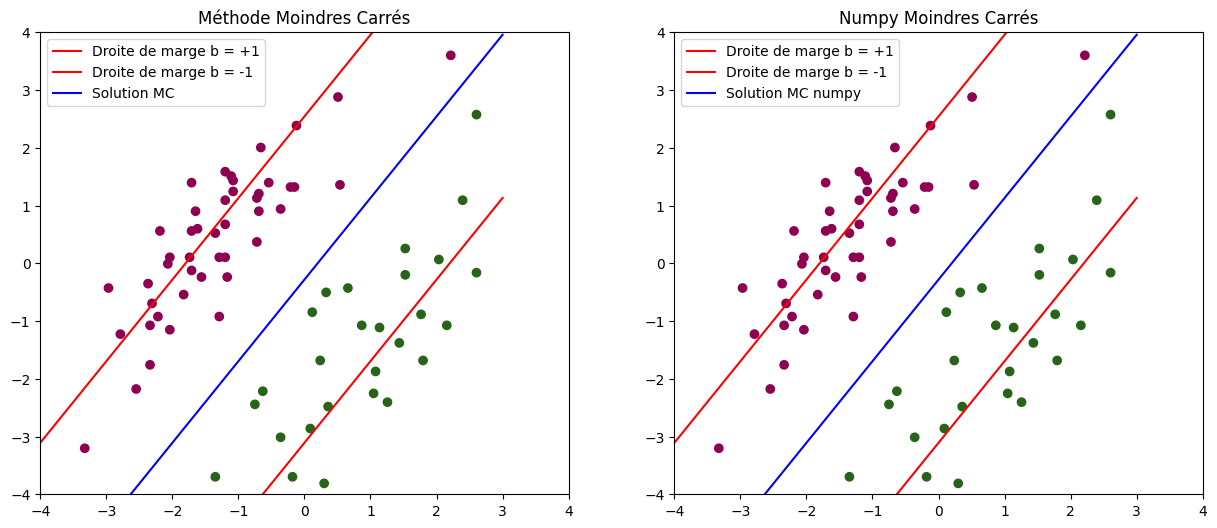

In [ ]:
# Matrice des caractéristiques
X = np.column_stack((x1, x2, np.ones_like(x1)))  # Ajouter le biais
y = t

# Moindres carrés
wmc, _, _, _ = np.linalg.lstsq(X, y, rcond=None)
print(f"Équation de l'hyperplan : {wmc[0]} * x1 + {wmc[1]} * x2 + {wmc[2]} = 0")

yy_np_p1 = hyperplan(wmc, xx, 1)
yy_np_m1 = hyperplan(wmc, xx, -1)
yy_np = hyperplan(wmc, xx, 0)

fig, axs = plt.subplots(1,2, figsize=(15,6))

axs[0].scatter(x1, x2, c=t)
axs[0].plot(xx, yy_p1, 'r', label='Droite de marge b = +1')
axs[0].plot(xx, yy_m1, 'r', label='Droite de marge b = -1')
axs[0].plot(xx, yy, 'b', label='Solution MC')
axs[0].legend(), axs[0].set_title('Méthode Moindres Carrés')
axs[0].set_xlim(-4, 4), axs[0].set_ylim(-4, 4)

axs[2-1].scatter(x1, x2, c=t)
axs[2-1].plot(xx, yy_np_p1, 'r', label='Droite de marge b = +1')
axs[2-1].plot(xx, yy_np_m1, 'r', label='Droite de marge b = -1')
axs[2-1].plot(xx, yy_np, 'b', label='Solution MC numpy')
axs[2-1].legend(), axs[2-1].set_title('Numpy Moindres Carrés')
axs[2-1].set_xlim(-4, 4), axs[2-1].set_ylim(-4, 4)
plt.show()

### Avec d'autres données

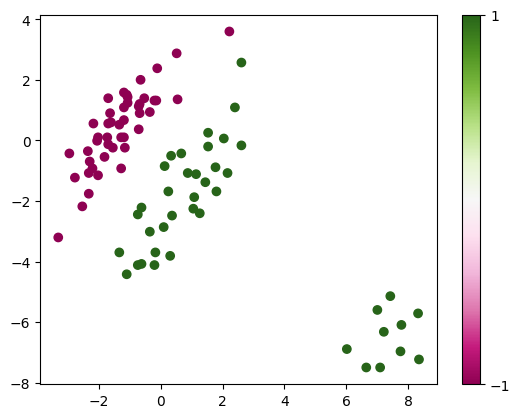

In [104]:
data442 = loadmat('data442.mat')
t, x1, x2 = data442['t'], data442['x1'], data442['x2']
plt.figure()
plt.scatter(x1, x2, c=t), plt.colorbar(ticks=[-1,1])
plt.show()

On constate la présence " d'outliers ", entre guillements car ils sont justes éloignés du premier groupe, ce qui risque de déplacer la moyenne de la classe positive.

Équation de la droite : [67.82452297] + [-50.73801365] * x1 + [-8.68598121] * x2 = 0
200 itérations


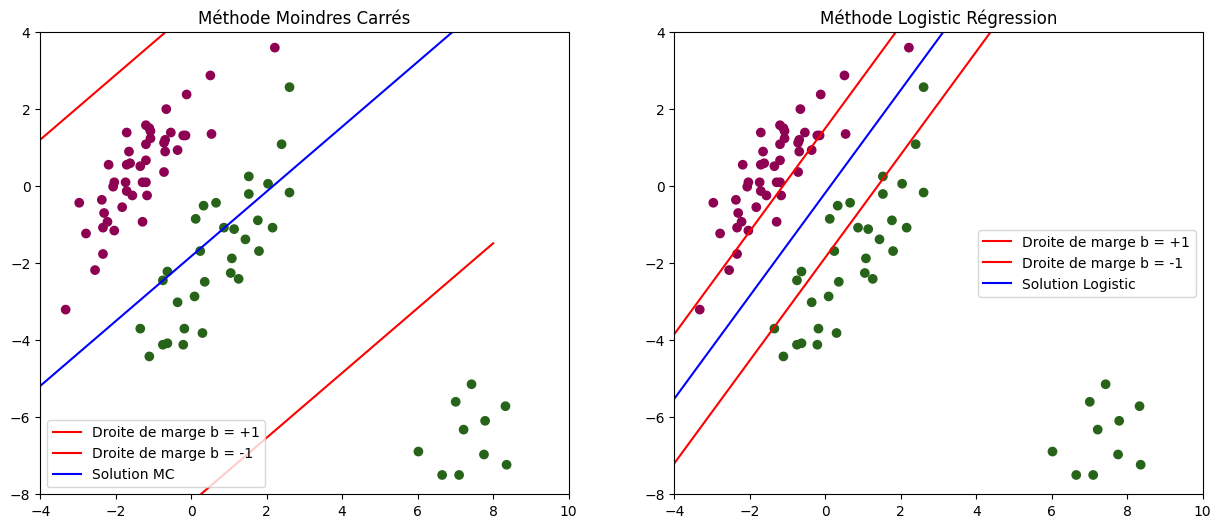

In [106]:
N = t.shape[0] # Nombre de points 
D = 2 # Dimensions 

# Valeurs cibles (marges positives en config normalisée)
B = np.ones(shape=(N, 1))

# Matrice Y : échantillons augmentés et normalisés
Y = np.concatenate((t * x1, t * x2, t), axis=1)

# Matrice pseudo-inverse (car Ya = B --> a = YpB)
Yp = np.linalg.pinv(Y)

a = np.dot(Yp, B)

xx = np.linspace(np.ceil(np.min(np.concatenate((x1, x2)))), np.floor(np.max(np.concatenate((x1, x2)))))
yy_p1 = hyperplan(a, xx, 1)
yy_m1 = hyperplan(a, xx, -1)
yy = hyperplan(a, xx, 0)

w = logistic_regression(x1, x2, (t+1)/2)
w = w / np.linalg.norm(w)

yy_lr_p1 = hyperplan(w, xx, 1)
yy_lr_m1 = hyperplan(w, xx, -1)
yy_lr = hyperplan(w, xx, 0)

fig, axs = plt.subplots(1,2, figsize=(15,6))
axs[0].scatter(x1, x2, c=t)
axs[0].plot(xx, yy_p1, 'r', label='Droite de marge b = +1')
axs[0].plot(xx, yy_m1, 'r', label='Droite de marge b = -1')
axs[0].plot(xx, yy, 'b', label='Solution MC')
axs[0].legend(), axs[0].set_title('Méthode Moindres Carrés')
axs[0].set_xlim(-4, 10), axs[0].set_ylim(-8, 4)

axs[1].scatter(x1, x2, c=t)
axs[1].plot(xx, yy_lr_p1, 'r', label='Droite de marge b = +1')
axs[1].plot(xx, yy_lr_m1, 'r', label='Droite de marge b = -1')
axs[1].plot(xx, yy_lr, 'b', label='Solution Logistic')
axs[1].legend(), axs[1].set_title('Méthode Logistic Régression')
axs[1].set_xlim(-4, 10), axs[1].set_ylim(-8, 4)

plt.show()

La méthode des moindres carrés ne résiste clairement pas à la non-compacité du groupe positif. Cependant, la régression logistique n'est pas influencé par ça. Cela s'explique par la présence de la fonction sigmoide, qui écrase la fonction distance entre 0 et 1.